<a href="https://colab.research.google.com/github/kingswallow/Project1/blob/main/Section3_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**배틀그라운드 : 현재 상황에 따른 생존률 예측**


배틀그라운드는 3인칭 또는 1인칭 슈팅 게임 장르로서 배틀로얄 형식의 게임입니다. 배틀로얄이란 게임에 참여하는 인원들이 서로 실력을 겨루어 최종적으로 한 팀만이 살아남는 형태의 게임을 칭합니다. 유저는 비행하는 비행기에서 자유낙하하여 원하는 지점에 도달한 뒤 생존을 위한 여러 물품등을 구비하며 전투에 대비할 수 있습니다. 이 때 생존을 위한 도구는 아이템이라고 부르는데, 이 아이템들은 총기류와 의료용품, 방탄복과 방탄헬멧 같은 보호장비를 총칭합니다. 우리는 이번 발표를 통해서 배틀그라운드를 즐길 때 어떤 상황을 만들어야 생존률을 높일 수 있는지에 대해서 알아볼 것입니다.


In [ ]:
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as r
import warnings
warnings.filterwarnings('ignore') # 경고메세지 숨기기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kills = pd.read_csv('/content/drive/MyDrive/Project3/kill_match_stats_final_0.csv')

In [ ]:
kills = kills.dropna(axis = 0, how = "any") #결측치를 NA로 떨어냅니다.

In [ ]:
kills.head()

killed_by       killer_name  killer_placement  killer_position_x  \
0       Grenade   KrazyPortuguese               5.0          657725.10   
1        SCAR-L  nide2Bxiaojiejie              31.0           93091.37   
2          S686          Ascholes              43.0          366921.40   
3  Down and Out        Weirdo7777               9.0          472014.20   
4          M416         Solayuki1               9.0          473357.80   

   killer_position_y      map  \
0           146275.2  MIRAMAR   
1           722236.4  MIRAMAR   
2           421623.9  MIRAMAR   
3           313274.8  MIRAMAR   
4           318340.5  MIRAMAR   

                                            match_id  time      victim_name  \
0  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   823  KrazyPortuguese   
1  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   194      X3evolution   
2  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   103          CtrlZee   
3  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018        BlackDpre   
4  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018            Vjolt   

   victim_placement  victim_position_x  victim_position_y  
0               5.0          657725.10           146275.2  
1              33.0           92238.68           723375.1  
2              46.0          367304.50           421216.1  
3              13.0          476645.90           316758.4  
4              13.0          473588.50           318418.8

In [ ]:
kills.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12100406 entries, 0 to 13426347
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   killed_by          object 
 1   killer_name        object 
 2   killer_placement   float64
 3   killer_position_x  float64
 4   killer_position_y  float64
 5   map                object 
 6   match_id           object 
 7   time               int64  
 8   victim_name        object 
 9   victim_placement   float64
 10  victim_position_x  float64
 11  victim_position_y  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.2+ GB


각 상황에 따른 생존률을 예측하기 위하여 생존에 영향을 주는 특성들을 정리해보았습니다.

#kill_distance
간단한 피타고라스 공식을 통해서 공격자와 피해자의 거리를 예측해봤습니다.

In [ ]:
kills["kill_distance"] = ((kills["killer_position_x"] - kills["victim_position_x"]) ** 2 + (kills["killer_position_y"] - kills["victim_position_y"]) ** 2) ** (1/2)

#lace_diff
이 변수는 공격자와 피해자가 위치한 장소의 차이를 알려줍니다. 게임에는 최대 100명의 플레이어가 있으므로 배치도는 1에서 100까지 다양합니다

In [ ]:
kills["place_diff"] = kills["victim_placement"] - kills["killer_placement"]

#winners, winner_kills
게임의 승리자가 얼마나 많은 킬수를 기록했는지를 알아보는 변수입니다. 1등 플레이어는 팀에 몇명이 소속되어 있는지에 따라 그 수가 달라질 수 있기 때문에 이 경우에는 승리자 전원을 변수에 포함시켰습니다.

In [ ]:
winners = dict(kills[kills["killer_placement"] == 1][["killer_name", "match_id"]].groupby("match_id").size())

In [ ]:
kills["winner_kills"] = kills["match_id"].map(winners, kills["match_id"])

In [ ]:
kills.head()

killed_by       killer_name  killer_placement  killer_position_x  \
0       Grenade   KrazyPortuguese               5.0          657725.10   
1        SCAR-L  nide2Bxiaojiejie              31.0           93091.37   
2          S686          Ascholes              43.0          366921.40   
3  Down and Out        Weirdo7777               9.0          472014.20   
4          M416         Solayuki1               9.0          473357.80   

   killer_position_y      map  \
0           146275.2  MIRAMAR   
1           722236.4  MIRAMAR   
2           421623.9  MIRAMAR   
3           313274.8  MIRAMAR   
4           318340.5  MIRAMAR   

                                            match_id  time      victim_name  \
0  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   823  KrazyPortuguese   
1  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   194      X3evolution   
2  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...   103          CtrlZee   
3  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018        BlackDpre   
4  2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...  1018            Vjolt   

   victim_placement  victim_position_x  victim_position_y  kill_distance  \
0               5.0          657725.10           146275.2       0.000000   
1              33.0           92238.68           723375.1    1422.574401   
2              46.0          367304.50           421216.1     559.523413   
3              13.0          476645.90           316758.4    5795.525330   
4              13.0          473588.50           318418.8     243.625491   

   place_diff  winner_kills  
0         0.0          13.0  
1         2.0          13.0  
2         3.0          13.0  
3         4.0          13.0  
4         4.0          13.0

기본이 될 작업을 해보았습니다.

In [ ]:
def remove_outliers(kills, var): #아웃라이어 삭제
    lower_bound = np.quantile(kills[var], 0.25) - (1.5 * (np.quantile(kills[var], 0.75) - np.quantile(kills[var], 0.25))) #제 1사분위
    upper_bound = np.quantile(kills[var], 0.75) + (1.5 * (np.quantile(kills[var], 0.75) - np.quantile(kills[var], 0.25))) #제 3사분위
    kills = kills[(kills[var] >= lower_bound) & (kills[var] <= upper_bound)]
    return kills

def distribution_cont(kills, var): #각 항목에 들어갈 것들 미리 만들어놓기
    if var == "kill_distance":
        kills = remove_outliers(kills, var)
    plt.hist(kills[var])
    plt.axvline(x = np.mean(kills[var]), c = "r")
    plt.text(0.7, 0.9, f"Mean: {round(np.mean(kills[var]), 2)}", transform = plt.gca().transAxes)
    plt.xlabel(f"{var}")
    plt.ylabel("Count")
    plt.title(f"Distribution of {var}")
    plt.show()
    
def basic_plot(kills, var): #그래프 형태 정하기
    if var == "killed_by":
        grouped = kills.groupby(var).size().sort_values(ascending = False).head(10)
        plt.xticks(rotation = 90)
    else:
        grouped = kills.groupby(var).size().sort_values(ascending = False)
    plt.bar(grouped.index.values, grouped.values)
    plt.title(f"{var} Distribution")
    plt.show()

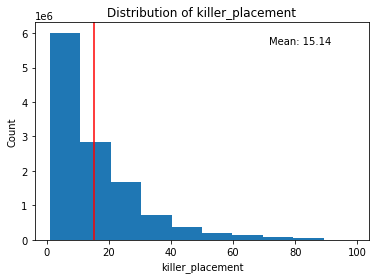

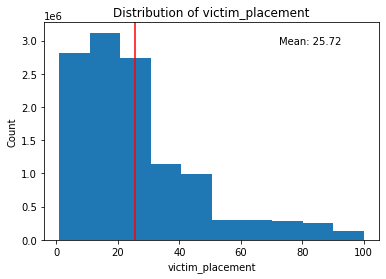

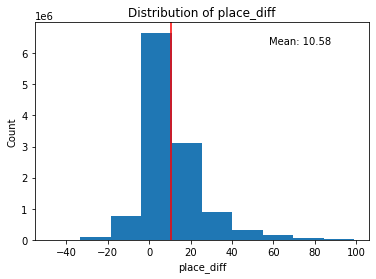

[None, None, None]

In [ ]:
[distribution_cont(kills, i) for i in ["killer_placement", "victim_placement", "place_diff"]]

공격자들은 희생자를 만들어낸 직후에 자주 제거대상이 됩니다. 때로는 멈추지 않고 계속 희생자를 만들어내서 승리자가 되기도 합니다.

#위치와 거리

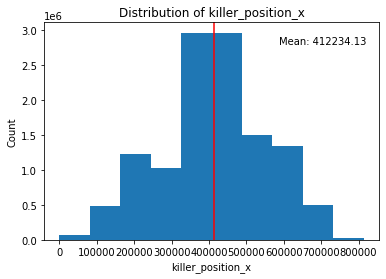

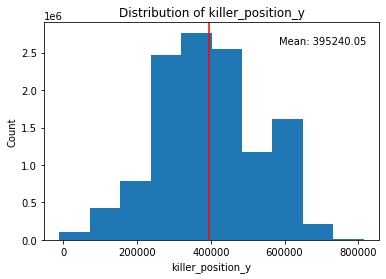

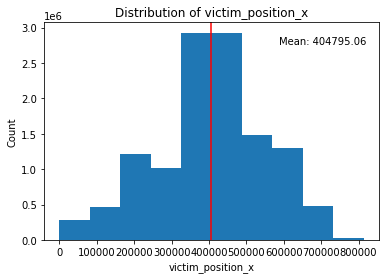

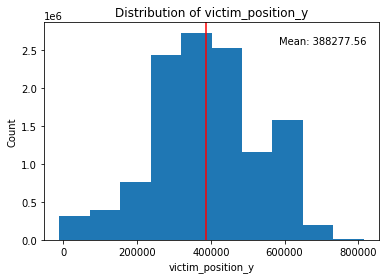

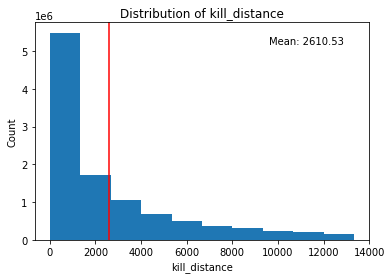

[None, None, None, None, None]

In [ ]:
[distribution_cont(kills, i) for i in ["killer_position_x", "killer_position_y", "victim_position_x", "victim_position_y", "kill_distance"]]

# 시간

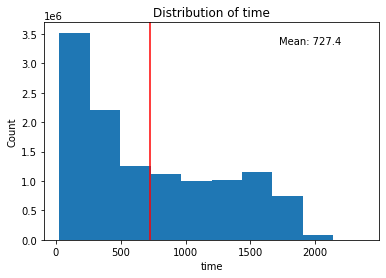

[None]

In [ ]:
[distribution_cont(kills, i) for i in ["time"]]

# 승리자 킬 수

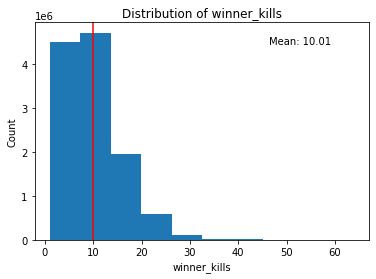

[None]

In [ ]:
[distribution_cont(kills, i) for i in ["winner_kills"]]

# 맵 (에란겔 or 미라마)

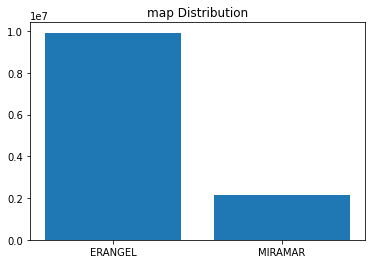

In [ ]:
basic_plot(kills, "map")

# 무기 및 사망원인


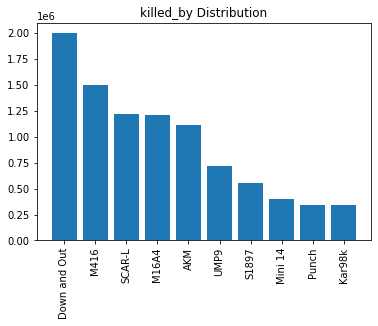

In [ ]:
basic_plot(kills, "killed_by")

Down and out은 팀원이 생존해있을 경우 바로 사망처리 되지 않고 '기절(Down)'상태가 되게 되는데, 그 상황에서 생존시간이 오버되어 사망한 경우를 말합니다.

In [ ]:
erangel = kills[kills["map"] == "ERANGEL"]
erangel_sample = erangel.sample(n = 10, random_state = 34)

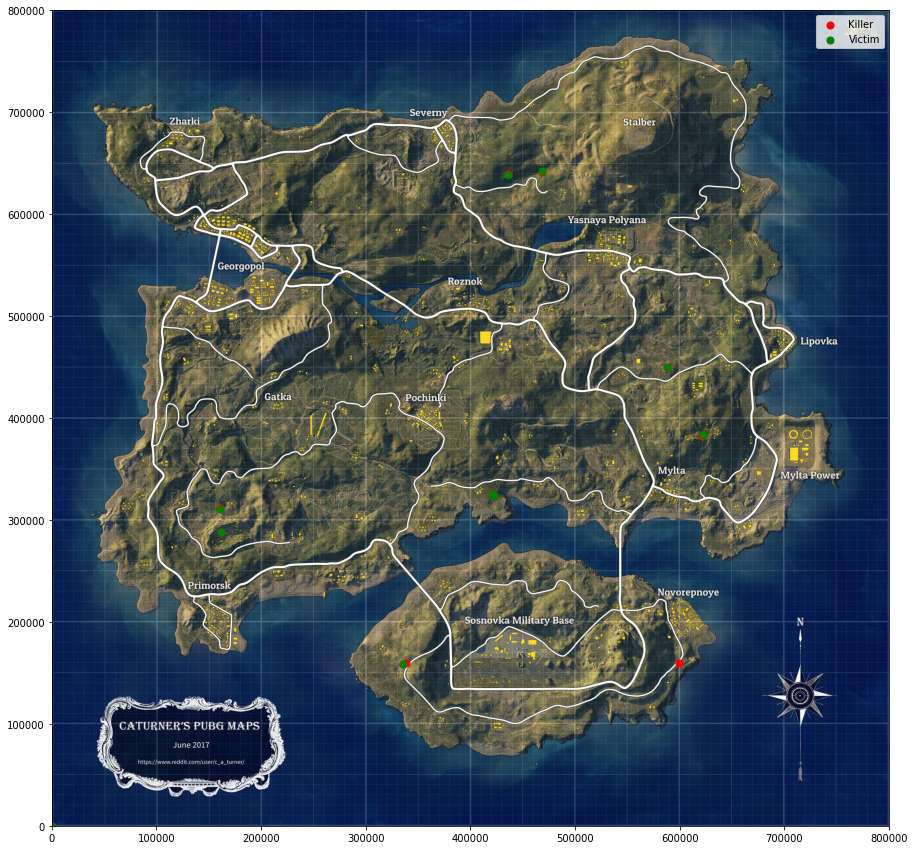

In [ ]:
img = plt.imread('/content/drive/MyDrive/Project3/erangel.jpg')

plt.subplots(figsize = (15,15))
plt.imshow(img,aspect='auto', extent=[0, 800000, 0, 800000])
plt.scatter(erangel_sample["killer_position_x"], erangel_sample["killer_position_y"], c = "r", s = 50)
plt.scatter(erangel_sample["victim_position_x"], erangel_sample["victim_position_y"], c = "g", s = 50)
plt.legend(["Killer", "Victim"], loc = "upper right")
plt.show()

# 유저의 이동

In [ ]:
def get_player_movement(kills, match_id, player_name):
    game = kills[kills["match_id"] == match_id]
    player = game[(game["killer_name"] == player_name) | (game["victim_name"] == player_name)].sort_values(by = "time")
    m = player.iloc[0]["map"]
    place = int(player.iloc[0]["killer_placement"])
    kills = len(list(player[player["killer_name"] == player_name]["killer_name"]))
    killer_name = player.iloc[-1]["killer_name"]
    killed_by = player.iloc[-1]["killed_by"]
    
    if m == "ERANGEL":
        img = plt.imread("/content/drive/MyDrive/Project3/erangel.jpg")
    else:
        img = plt.imread("/content/drive/MyDrive/Project3/miramar.jpg")
    plt.subplots(figsize = (12,12))
    plt.imshow(img, aspect='auto', extent=[0, 800000, 0, 800000])
    plt.scatter(player["killer_position_x"].iloc[0:-2], player["killer_position_y"].iloc[0:-2], c = "g", s = 100)
    plt.scatter(player["victim_position_x"].iloc[-1], player["victim_position_y"].iloc[-1], c = "r", s = 100)
    if place != 1:
        plt.title(f"{player_name}'s Game (Place: #{place}, Kills: {kills}, Killed by {killer_name} with {killed_by})")
        plt.legend(["Kill", "Point of Death"], loc = "upper right")
    else:
        plt.title(f"{player_name}'s Game (Place: #{place}, Kills: {kills})")
        plt.legend(["Kill", "Last Kill"], loc = "upper right")

In [ ]:
rand_match = kills.iloc[r.randint(0, 11908315)]

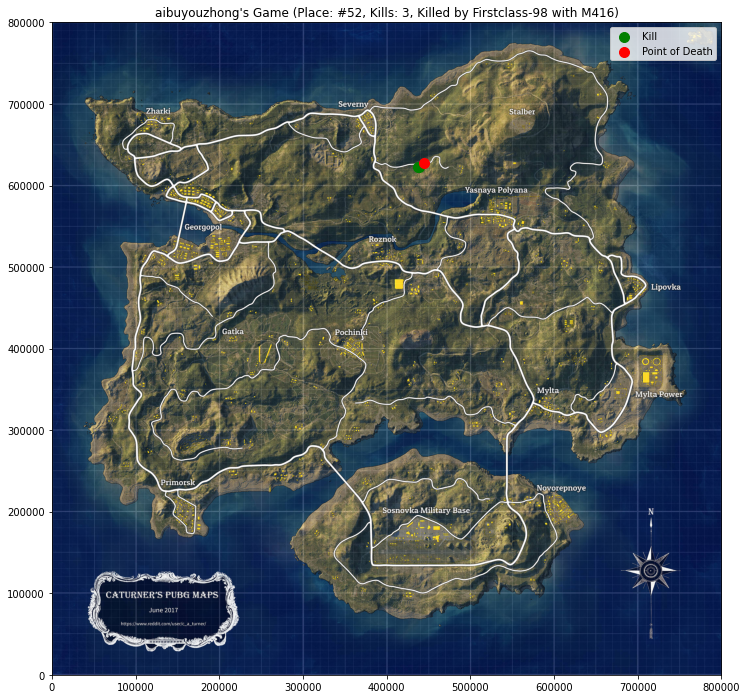

In [ ]:
get_player_movement(kills, rand_match["match_id"], rand_match["killer_name"])

In [ ]:
rand_match2 = kills.iloc[r.randint(0, 11908315)]

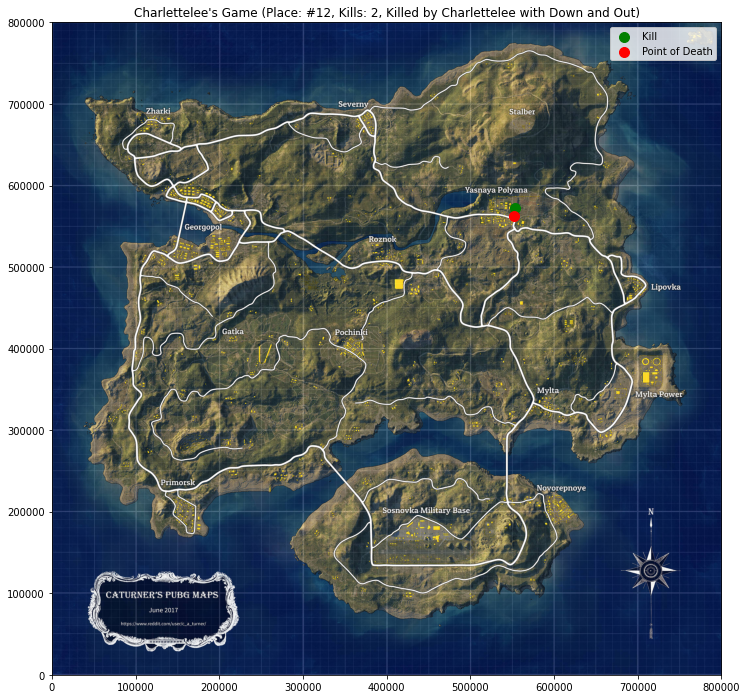

In [ ]:
get_player_movement(kills, rand_match2["match_id"], rand_match2["killer_name"])

# 어떤 무기가 다양한 거리에서 효율적일까? (무난하게 좋을까)


In [ ]:
distances = remove_outliers(kills, "kill_distance")

킬 거리는 어느정도로 분포되어 있을까?

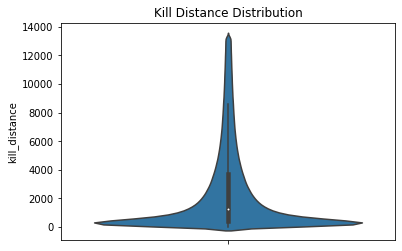

In [ ]:
sns.violinplot(data = distances, y = "kill_distance")
plt.title("Kill Distance Distribution")
plt.show()

In [ ]:
def prop_list(lst):
    weapons = list(lst)
    weapon_props = []
    distinct_weapons = list(set(weapons))
    for i in distinct_weapons:
        counter = 0
        for j in weapons:
            if i == j:
                counter += 1
        weapon_props.append(counter / len(weapons))
    return dict(zip(distinct_weapons, weapon_props))

In [ ]:
# 무기 찾기 
def prop_list(lst):
    weapons = list(lst)
    weapon_props = []
    distinct_weapons = list(set(weapons))
    for i in distinct_weapons:
        counter = 0
        for j in weapons:
            if i == j:
                counter += 1
        weapon_props.append(counter / len(weapons))
    return dict(zip(distinct_weapons, weapon_props))

In [ ]:
distances["weapon_prop"] = distances["killed_by"].map(prop_list(distances["killed_by"]), distances["killed_by"])

In [ ]:
def get_weapons_range(distances, perc_low, perc_high):
    lower_quantile = np.quantile(distances["kill_distance"], perc_low)
    upper_quantile = np.quantile(distances["kill_distance"], perc_high)
    distances2 = distances[(distances["kill_distance"] >= lower_quantile) & (distances["kill_distance"] <= upper_quantile)]
    
    weapon_counts = distances2.groupby("killed_by").size().sort_values(ascending = False).head(10)
    
    distances2["weapon_prop_filtered"] = distances2["killed_by"].map(prop_list(distances2["killed_by"]), distances2["killed_by"])
    distances2["conditional_prob"] = (distances2["weapon_prop_filtered"] - distances2["weapon_prop"])
    distinct_props = distances2[["killed_by", "conditional_prob"]].drop_duplicates().sort_values(by = "conditional_prob", ascending = False).head(10)
    
    plt.subplots(figsize = (10,6))
    plt.subplot(1,2,1)
    sns.barplot(weapon_counts.index.values, weapon_counts.values)
    plt.xticks(rotation = 90)
    plt.title(f"By Frequency ({perc_low} to {perc_high} Percentile)")
    plt.subplot(1,2,2)
    sns.barplot(distinct_props["killed_by"], distinct_props["conditional_prob"])
    plt.xticks(rotation = 90)
    plt.title(f"By Proportion Diff ({perc_low} to {perc_high} Percentile)")
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()

# Very Short Distance Kills

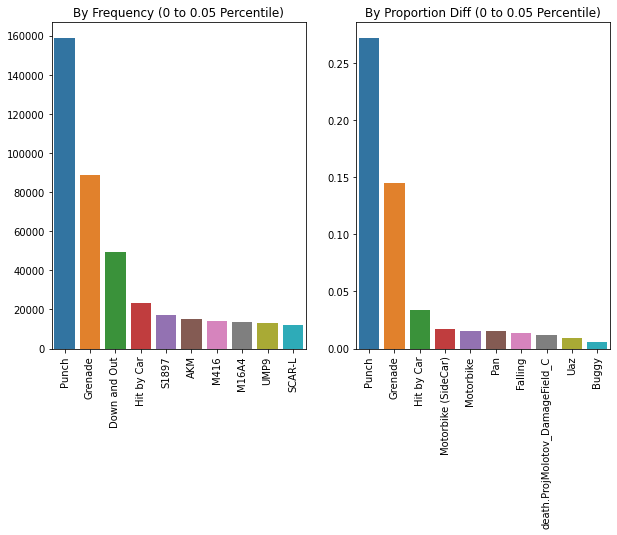

In [ ]:
get_weapons_range(distances, 0, 0.05)

# Short Distance Kills

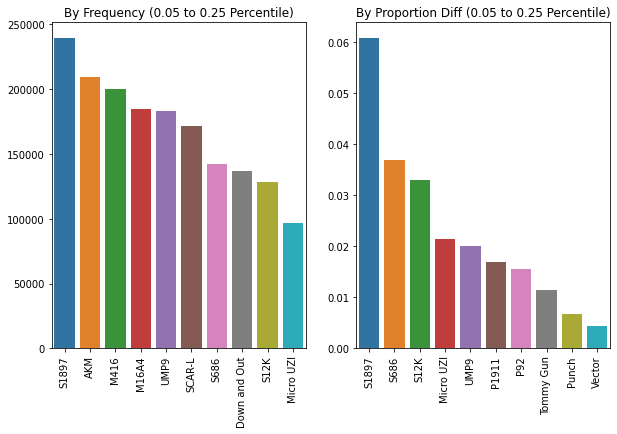

In [ ]:
get_weapons_range(distances, 0.05, 0.25)

# Medium Distance Kills¶

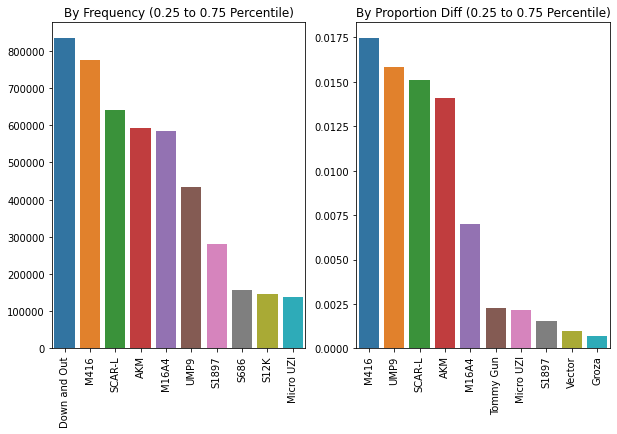

In [ ]:
get_weapons_range(distances, 0.25, 0.75)

# Long Distance Kills

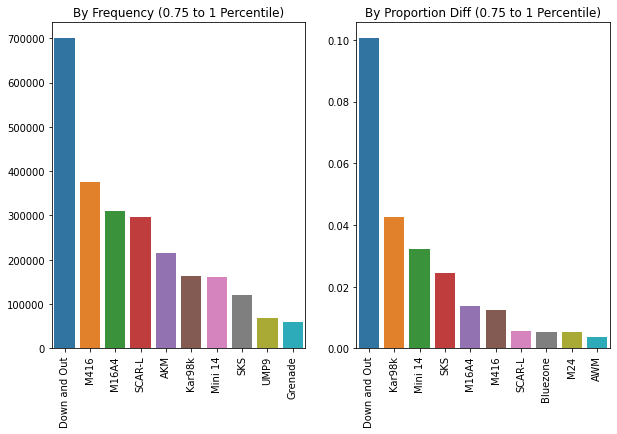

In [ ]:
get_weapons_range(distances, 0.75, 1)

# 시간에 따른 분석


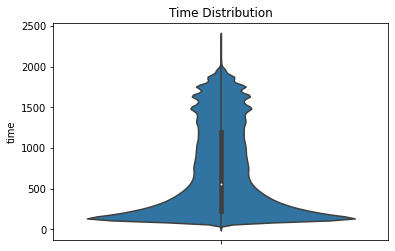

In [ ]:
sns.violinplot(data = kills, y = "time")
plt.title("Time Distribution")
plt.show()

In [ ]:
def weapons_time(kills, min_time, max_time = max(list(kills["time"]))):
    
    time_range = kills[(kills["time"] >= min_time) & (kills["time"] <= max_time)]
    grouped_time = time_range.groupby("killed_by").size().sort_values(ascending = False)
    top_10 = grouped_time.head(10)
    deaths = sum(list(grouped_time.values))
    
    sns.barplot(top_10.index.values, top_10.values)
    plt.title(f"Top 10 Weapons ({min_time} to {max_time} sec.); {deaths} Total Deaths")
    plt.xticks(rotation = 90)
    plt.show()

# The First Minute

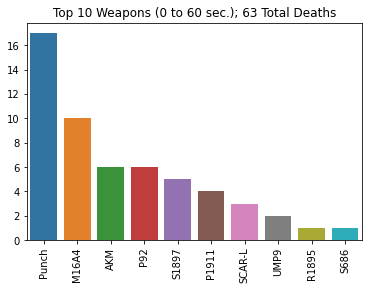

In [ ]:
weapons_time(kills, 0, 60)

# The First 3 Minutes

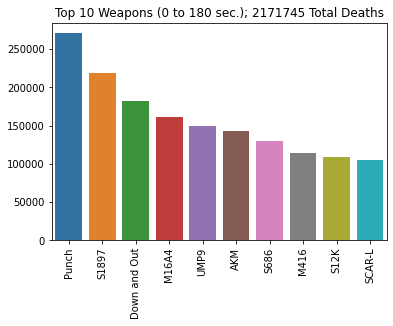

In [ ]:
weapons_time(kills, 0, 180)

# The Middle of the Game

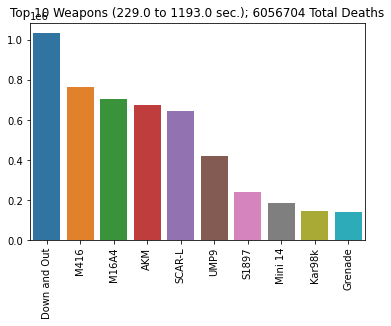

In [ ]:
weapons_time(kills, np.quantile(kills["time"], 0.25), np.quantile(kills["time"], 0.75))

# The End of the Game

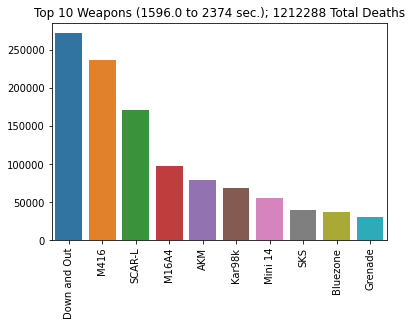

In [ ]:
weapons_time(kills, np.quantile(kills["time"], 0.9))

게임 내에서 베스트인 총은 모든 시간 타임라인에서 우세를 띠는 M16과 SCAR-L로 보인다.

# 많은 킬 수를 올리는 것이 승리에 도움이 될까?

In [ ]:
inc_wins = kills

In [ ]:
place = prop_list(inc_wins["killer_placement"])

In [ ]:
inc_wins["kill_prop"] = inc_wins["killer_placement"].map(place, inc_wins["killer_placement"])

In [ ]:
place_df = inc_wins[["killer_placement", "kill_prop"]].drop_duplicates().sort_values(by = "killer_placement", ascending = False)

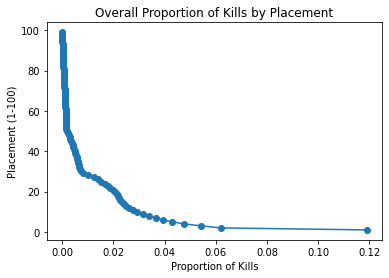

In [ ]:
plt.scatter(place_df["kill_prop"], place_df["killer_placement"])
plt.plot(place_df["kill_prop"], place_df["killer_placement"])
plt.xlabel("Proportion of Kills")
plt.ylabel("Placement (1-100)")
plt.title("Overall Proportion of Kills by Placement")
plt.show()

이 패턴에 따르면 캠핑보다 많은 킬 수를 위해 끊임없이 교전을 일으키는 것이 승리에 더 가까운 것임을 알 수 있다. 1등과 2등의 킬 비율은 약 두배에 달하는 것을 확인할 수 있다. 40위 이하는 일반적으로 발생하는 교전에서 생존하지 못했음을 알 수 있고 30위 부터 10위까지는 활동영역이 좁아지며 생기는 교전형태의 변환과 소규모전술의 차이로 인해 불규칙한 패턴을 보이는 것이 인상적이다.